In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [2]:
#导入数据
train_data = pd.read_csv("../DataMining/data_format1/train_format1.csv")
test_data = pd.read_csv("../DataMining/data_format1/test_format1.csv")

user_info = pd.read_csv("../DataMining/data_format1/user_info_format1.csv")
user_log = pd.read_csv("../DataMining/data_format1/user_log_format1.csv")

In [3]:
#1.查看用户信息缺失值-年龄值
#shape大小：
user_info.shape

(424170, 3)

In [4]:
#年龄数据总个数：
user_info["age_range"].count()

421953

In [5]:
#缺失率查看：
(user_info.shape[0]-user_info["age_range"].count())/user_info.shape[0]

0.005226677982884221

In [6]:
##当年龄为空或者等于0时默认为缺失
#缺失值查看：
user_info[user_info['age_range'].isna()|(user_info['age_range']==0)].count()

user_id      95131
age_range    92914
gender       90664
dtype: int64

In [7]:
#数据分组查看：
user_info.groupby(['age_range'])[['user_id']].count()

,user_id
age_range,
0.0,92914
1.0,24
2.0,52871
3.0,111654
4.0,79991
5.0,40777
6.0,35464
7.0,6992
8.0,1266


In [8]:
#空值查看：
user_info.shape[0]-user_info["age_range"].count()

2217

In [9]:
##2.查看用户信息数据的缺失——性别值
#缺失率查看：
(user_info.shape[0] - user_info["gender"].count()) / user_info.shape[0]

0.01517316170403376

In [10]:
# 当性别为空或者等于2时默认为缺失
# 缺失值查看：
user_info[user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      16862
age_range    14664
gender       10426
dtype: int64

In [11]:
#数据分组查看：
user_info.groupby(['gender'])[['user_id']].count()

,user_id
gender,
0.0,285638
1.0,121670
2.0,10426


In [12]:
#空值查看：
user_info.shape[0] - user_info["gender"].count()

6436

In [13]:
# 查看用户信息数据的缺失——年龄或性别：
user_info[user_info['age_range'].isna() | (user_info['age_range'] == 0) | user_info['gender'].isna() | (user_info['gender'] == 2)].count()

user_id      106330
age_range    104113
gender        99894
dtype: int64

In [14]:
#3.查看用户信息数据的缺失——用户行为日志数据缺失
user_log.isna().sum()

user_id            0
item_id            0
cat_id             0
seller_id          0
brand_id       91015
time_stamp         0
action_type        0
dtype: int64

In [15]:
#查看user_info基本数据描述:
user_info.describe()

,user_id,age_range,gender
count,424170.000000,421953.000000,417734.000000
mean,212085.500000,2.930262,0.341179
std,122447.476178,1.942978,0.524112
min,1.000000,0.000000,0.000000
25%,106043.250000,2.000000,0.000000
50%,212085.500000,3.000000,0.000000
75%,318127.750000,4.000000,1.000000
max,424170.000000,8.000000,2.000000


In [16]:
#查看user_log基本数据描述:
user_log.describe()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
count,5.492533e+07,5.492533e+07,5.492533e+07,5.492533e+07,5.483432e+07,5.492533e+07,5.492533e+07
mean,2.121568e+05,5.538613e+05,8.770308e+02,2.470941e+03,4.153348e+03,9.230953e+02,2.854458e-01
std,1.222872e+05,3.221459e+05,4.486269e+02,1.473310e+03,2.397679e+03,1.954305e+02,8.075806e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.110000e+02,0.000000e+00
25%,1.063360e+05,2.731680e+05,5.550000e+02,1.151000e+03,2.027000e+03,7.300000e+02,0.000000e+00
50%,2.126540e+05,5.555290e+05,8.210000e+02,2.459000e+03,4.065000e+03,1.010000e+03,0.000000e+00
75%,3.177500e+05,8.306890e+05,1.252000e+03,3.760000e+03,6.196000e+03,1.109000e+03,0.000000e+00
max,4.241700e+05,1.113166e+06,1.671000e+03,4.995000e+03,8.477000e+03,1.112000e+03,3.000000e+00


In [17]:
label_gp = train_data.groupby("label")["user_id"].count()
label_gp
'''
样本分布不均匀
需采取一定措施
'''

'\n样本分布不均匀\n需采取一定措施\n'

In [18]:
print("选取top5店铺\n店铺\t购买次数")
train_data.merchant_id.value_counts().head(5)

选取top5店铺
店铺	购买次数


4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64

In [19]:
#训练数据查看
# train_data.shape
train_data_merchant=train_data.copy()
train_data_merchant

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0
...,...,...,...
260859,359807,4325,0
260860,294527,3971,0
260861,294527,152,0
260862,294527,2537,0


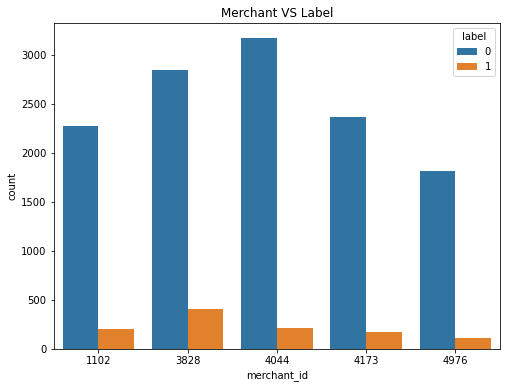

In [20]:
#top5店铺画图统计
train_data_merchant["TOP5"]=train_data_merchant["merchant_id"].map(lambda x: 1 if x in[4044,3828,4173,1102,4976] else 0)
train_data_merchant=train_data_merchant[train_data_merchant["TOP5"]==1]
plt.figure(figsize=(8,6))
plt.title("Merchant VS Label")
sax=sns.countplot("merchant_id",hue="label",data=train_data_merchant)

In [21]:
#查看top5
train_data_merchant

,user_id,merchant_id,label,TOP5
7,231552,3828,1,1
33,40320,4173,0,1
34,171648,3828,0,1
61,307584,4173,0,1
63,111744,3828,0,1
...,...,...,...,...
260677,326783,3828,0,1
260737,75647,4976,0,1
260812,90239,4173,0,1
260823,25727,4976,0,1


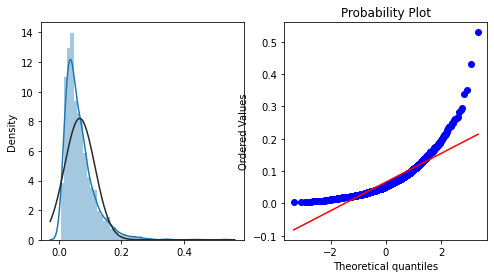

In [25]:
train_data.groupby(["merchant_id"])["label"].mean()
merchant_repeat_buy=[rate for rate in train_data.groupby(["merchant_id"])["label"].mean() if rate<=1 and rate > 0]
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy,fit=stats.norm)
ax=plt.subplot(1,2,2)
res=stats.probplot(merchant_repeat_buy,plot=plt)